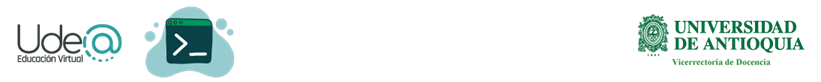

# Laboratorio Análisis de Componentes Principales (PCA)

**Autor:**
*   Pablo Alejandro Alvarado Duran, PhD.
*   Hernán Felipe García Arias, PhD.
*   Cristian David Ríos Urrego, MSc.
*   Diana Patricia Tobon Vallejo, PhD.

**Laboratorio Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

En este tutorial exploraremos el que quizás sea uno de los algoritmos no supervisados más utilizados: el análisis de componentes principales (PCA).
PCA es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como herramienta para la visualización, para el filtrado de ruido, para la extracción de características, y mucho más.

Comenzamos con las importaciones estándar:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## Introducción al análisis de componentes principales

El análisis de componentes principales es un método rápido y flexible para reducir la dimensionalidad de los datos. Su comportamiento es más fácil de visualizar observando un conjunto de datos bidimensional.
Considere los 200 puntos siguientes:

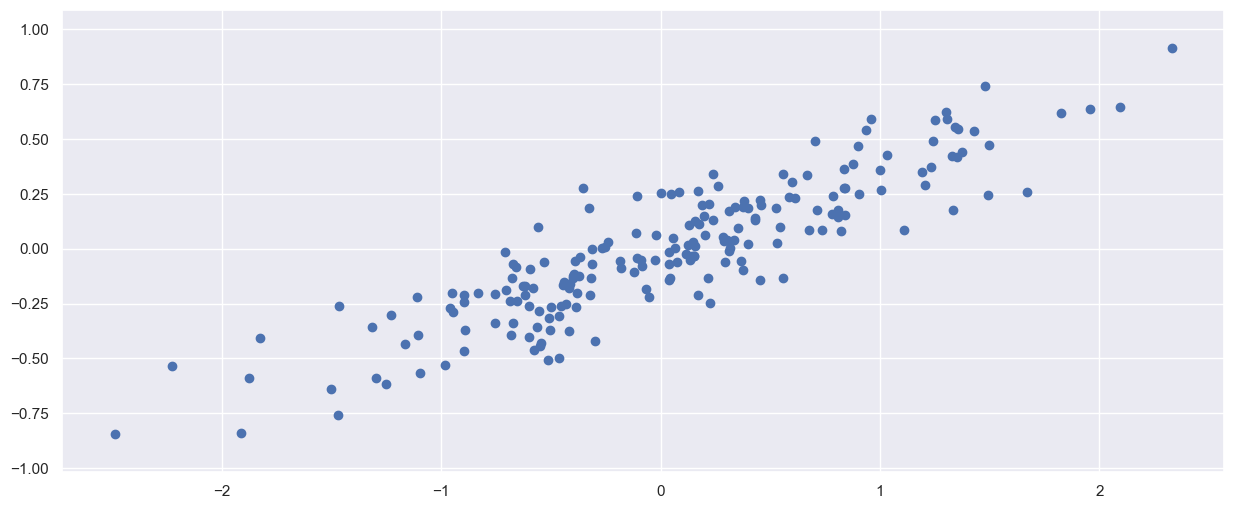

In [4]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.figure(figsize=(15,6))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

A simple vista, está claro que existe una relación casi lineal entre las variables $x$ e $y$.
En este caso, el problema es el siguiente: en lugar de intentar *predecir* los valores $y$ a partir de los valores $x$, el problema del aprendizaje no supervisado intenta aprender sobre la *relación* entre los valores $x$ e $y$.

En el análisis de componentes principales, esta relación se cuantifica encontrando una lista de los *ejes principales* en los datos, y utilizando esos ejes para describir el conjunto de datos.
Usando el estimador ``PCA`` de Scikit-Learn, podemos calcular lo siguiente:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)
print(X.shape)

(200, 2)


El ajuste aprende algunas cantidades de los datos, sobre todas las "componentes" y la "varianza explicada":

In [6]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [7]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Para ver qué significan estas cifras, visualicémoslas como vectores sobre los datos de entrada, utilizando las "componentes" para definir la dirección del vector, y la "varianza explicada" para definir la longitud al cuadrado del vector:

[ 0.03351168 -0.00408072]


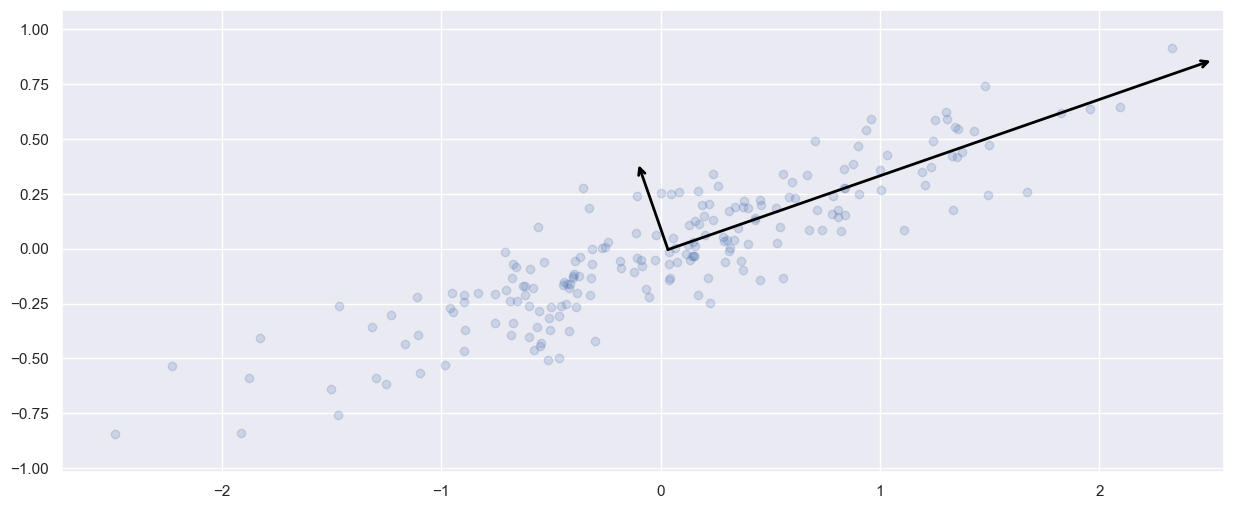

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.figure(figsize=(15,6))
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3. * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
print(pca.mean_)

Estos vectores representan los *ejes principales* de los datos, y la longitud del vector es una indicación de lo "importante" que es ese eje a la hora de describir la distribución de los datos; más exactamente, es una medida de la varianza de los datos cuando se proyectan sobre ese eje.
La proyección de cada punto sobre los ejes principales son las "componentes principales" de los datos.

Si trazamos estas componentes principales junto a los datos originales, veremos los gráficos que se muestran aquí:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-PCA-rotation.png?raw=1)


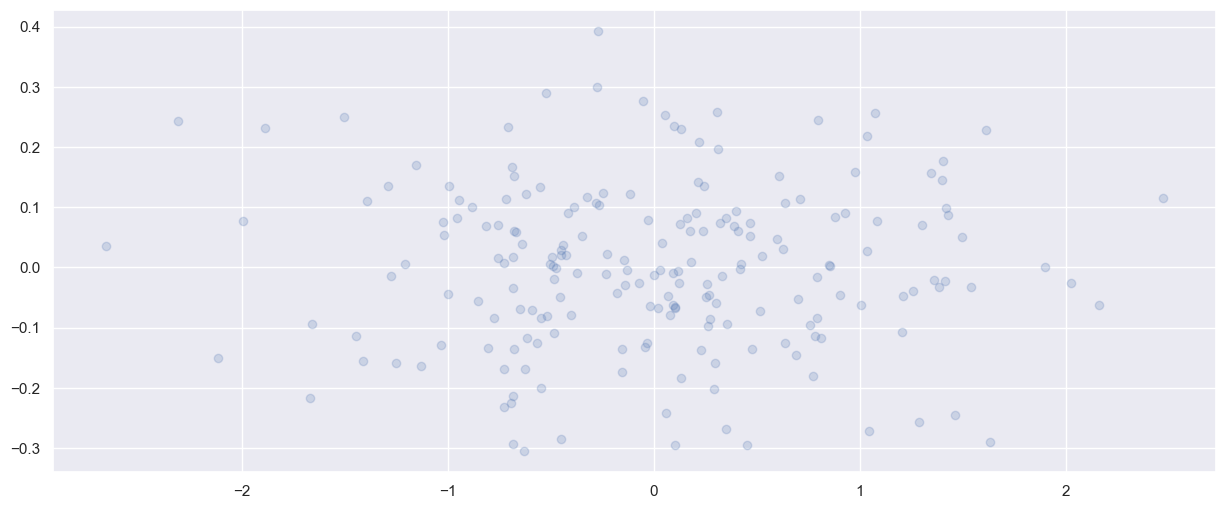

In [9]:
Z = pca.transform(X)
plt.figure(figsize=(15,6))
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.2)
plt.show()

Esta transformación de ejes de datos a ejes principales es una *transformación afín*, lo que básicamente significa que se compone de una **traslación**, una **rotación** y un **escalado** uniforme.

Aunque este algoritmo para hallar componentes principales puede parecer solo una curiosidad matemática, resulta que tiene aplicaciones de muy largo alcance en el mundo del aprendizaje automático y la exploración de datos:

1. Reducción de la Dimensionalidad.
2. Preprocesamiento de Datos en Aprendizaje Automático.
3. Compresión de Imágenes.
4. Reconocimiento Facial.
5. Visualización de Datos.

### PCA de manera intuitiva

In [10]:
from IPython.display import Video

Video("videoPCA.mp4", width=800, height=500)
# Fuente: https://www.youtube.com/watch?v=BfTMmoDFXyE

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')

### PCA como reducción de dimensión

El uso de PCA para la reducción de dimensión implica la eliminación de una o más componentes principales con menor porcentaje de varianza, lo que resulta en una proyección de menor dimensión de los datos que preserva la varianza máxima de los datos.

He aquí un ejemplo de uso de PCA como transformada para la reducción de dimensionalidad:

In [11]:
pca = PCA(n_components=1) # Creamos el modelo PCA
pca.fit(X) # Entrenamos el modelo
X_pca = pca.transform(X) # Transformamos los datos al espacio latente
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Con el fin de transformar de nuevo al espacio de entrada el conjunto de datos latentes ${\bf{Z}}$, tenemos:

- ${\bf{X}}\in \mathbb{R}^{N\times D}$
- ${\bf{W}}\in \mathbb{R}^{D\times q}$, donde $q$ son los eignevalores más relevantes de $\bf{X}$

- ${\bf{Z}} = {\bf{XW}} $
- ${\bf{Z}}{\bf{W}}^{-1} = {\bf{XW}}{\bf{W}}^{-1}$
- ${\bf{Z}}{\bf{W}}^{-1} = {\bf{X}}{\bf{I}}$
- ${\bf{X}}_{reproy} = {\bf{Z}}{\bf{W}}^{-1}$

Los datos transformados se han reducido a una sola dimensión.
Para comprender el efecto de esta reducción de la dimensionalidad, podemos realizar la transformada inversa de estos datos reducidos y representarlos gráficamente junto con los datos originales:

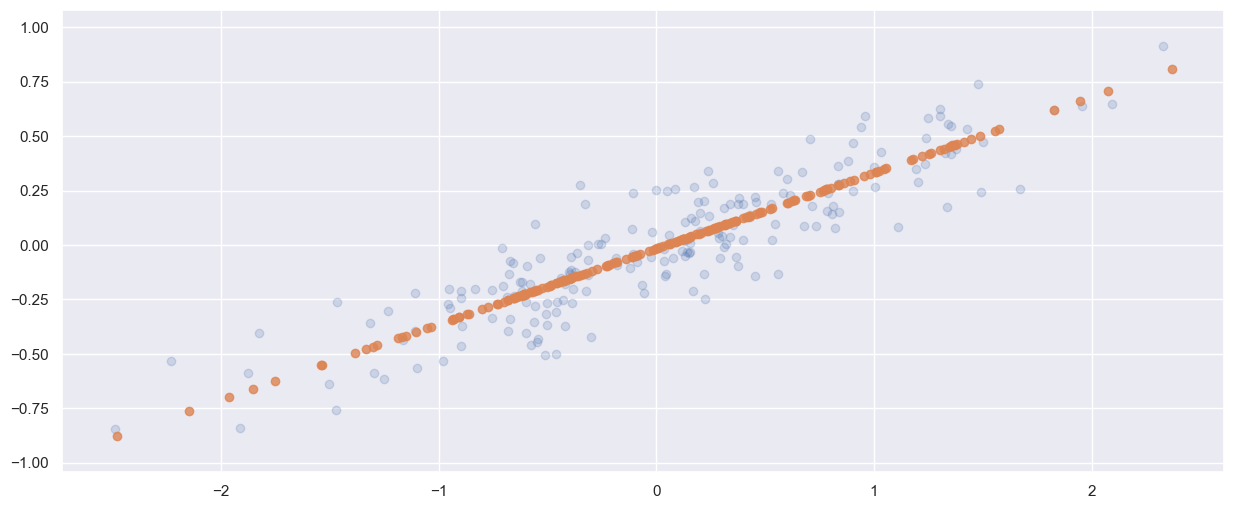

In [12]:
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(15,6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Los puntos claros son los datos originales, mientras que los oscuros son la versión proyectada.
En este caso PCA proyecta la información a lo largo del eje o ejes principales, dejando sólo la componente o las componentes con la mayor varianza.
La fracción de varianza que se elimina (proporcional a la dispersión de los puntos en torno a la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de la dimensionalidad.

Este conjunto de datos de dimensión reducida es, en cierto sentido, "suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 50%, la relación general entre los puntos de datos se conserva en su mayor parte.

### PCA para visualización: Dígitos escritos a mano

La utilidad de la reducción de dimensión puede no ser del todo evidente en sólo dos dimensiones, pero se vuelve mucho más clara cuando se observan datos de alta dimensión.
Para ver esto, echemos un vistazo rápido a la aplicación de PCA sobre datos de dígitos:

Empezamos cargando los datos:

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
N, D = digits.data.shape
print('# Observations: ', N,'\t# Features: ',D)

# Observations:  1797 	# Features:  64


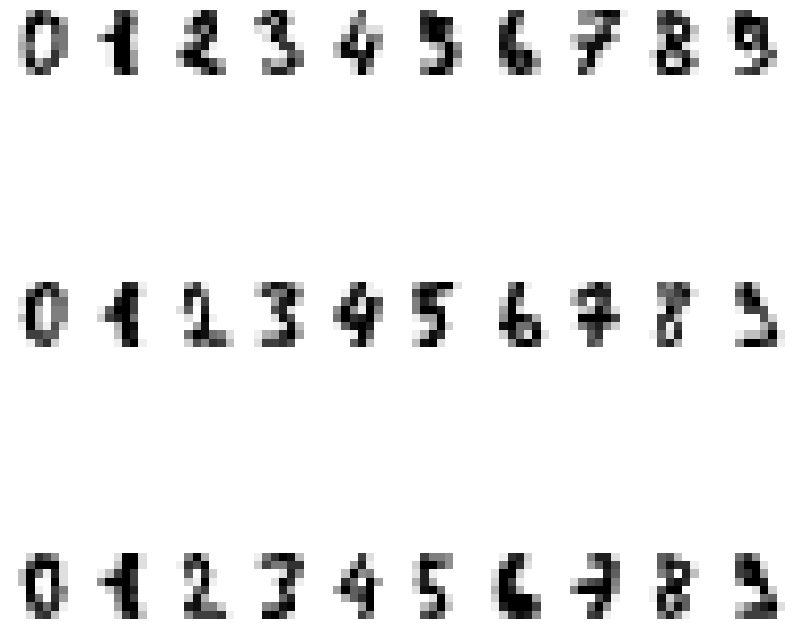

In [14]:
#Display the first ten digits
fig, axs = plt.subplots(3,10, figsize=(10, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()
for nDigit in range(30):
  digitImg = digits.images[nDigit]
  axs[nDigit].imshow(digitImg, cmap=plt.cm.gray_r, interpolation='nearest')
  axs[nDigit].axis('off')
plt.show()

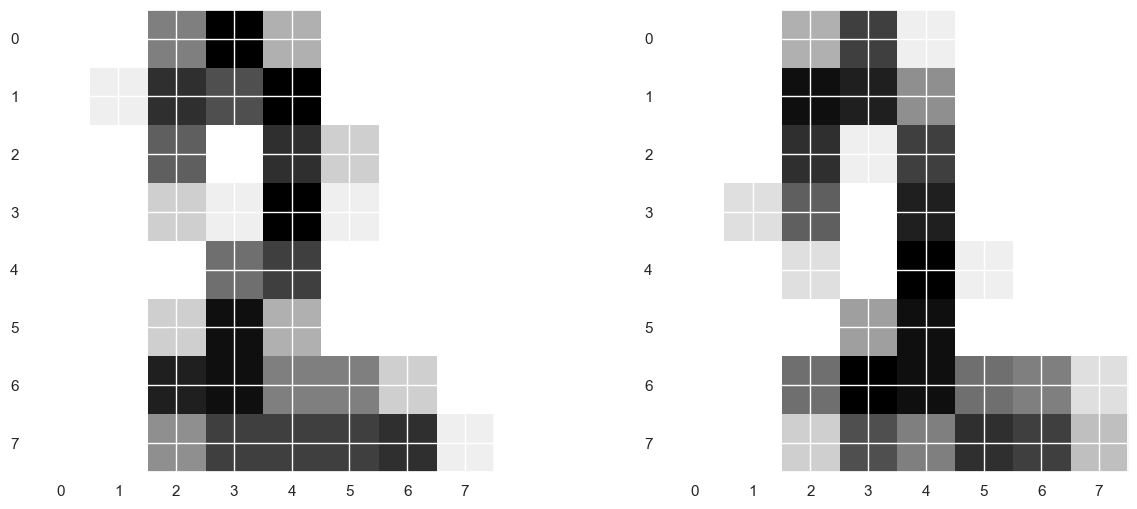

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.imshow(digits.images[20+2], cmap=plt.cm.gray_r)
ax2.imshow(digits.images[10+2], cmap=plt.cm.gray_r)
plt.show()

Recordemos que los datos consisten en imágenes de 8×8 píxeles, lo que significa que tienen 64 dimensiones.
Para intuir las relaciones entre estos puntos, podemos utilizar PCA para proyectarlos a un número más manejable de dimensiones, digamos dos:

Input Space: (1797, 64)
Latent Space: (1797, 64)
[1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 2.53547085e-15 0.000

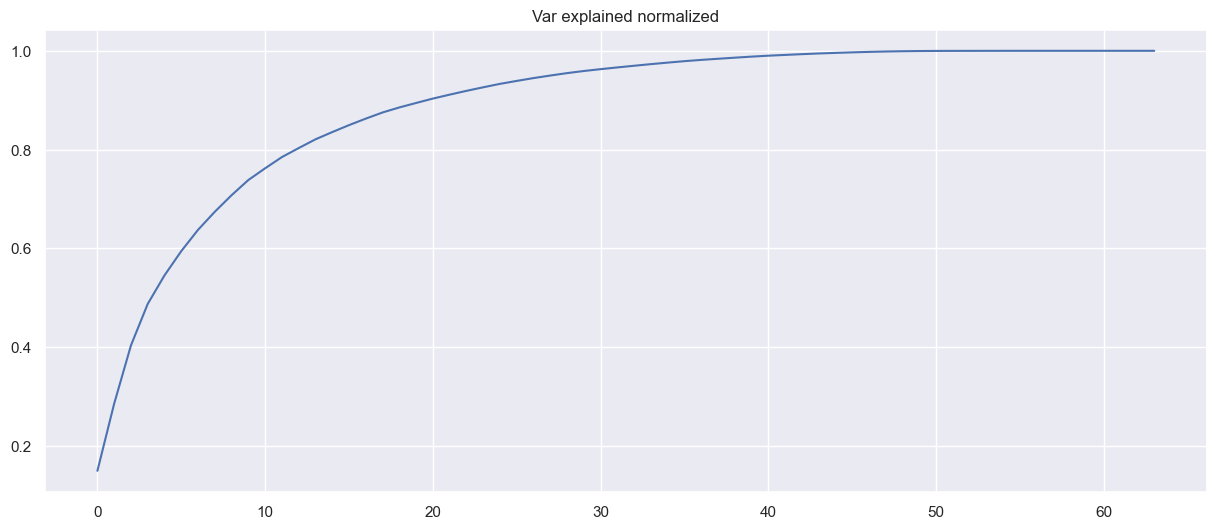

In [16]:
pca = PCA(n_components = 64)  
X = digits.data # Load our dataset X
projectedZ = pca.fit_transform(X)
BasisW = pca.components_
print('Input Space:',digits.data.shape)
print('Latent Space:',projectedZ.shape)
print(pca.explained_variance_)
print(BasisW.shape)

plt.figure(figsize=(15,6))
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Var explained normalized')
plt.show()

Ahora podemos observar las dos primeros componentes principales de cada punto para conocer los datos:

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(projectedZ[:, 0], projectedZ[:, 1],
             c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

<Figure size 1500x1000 with 0 Axes>

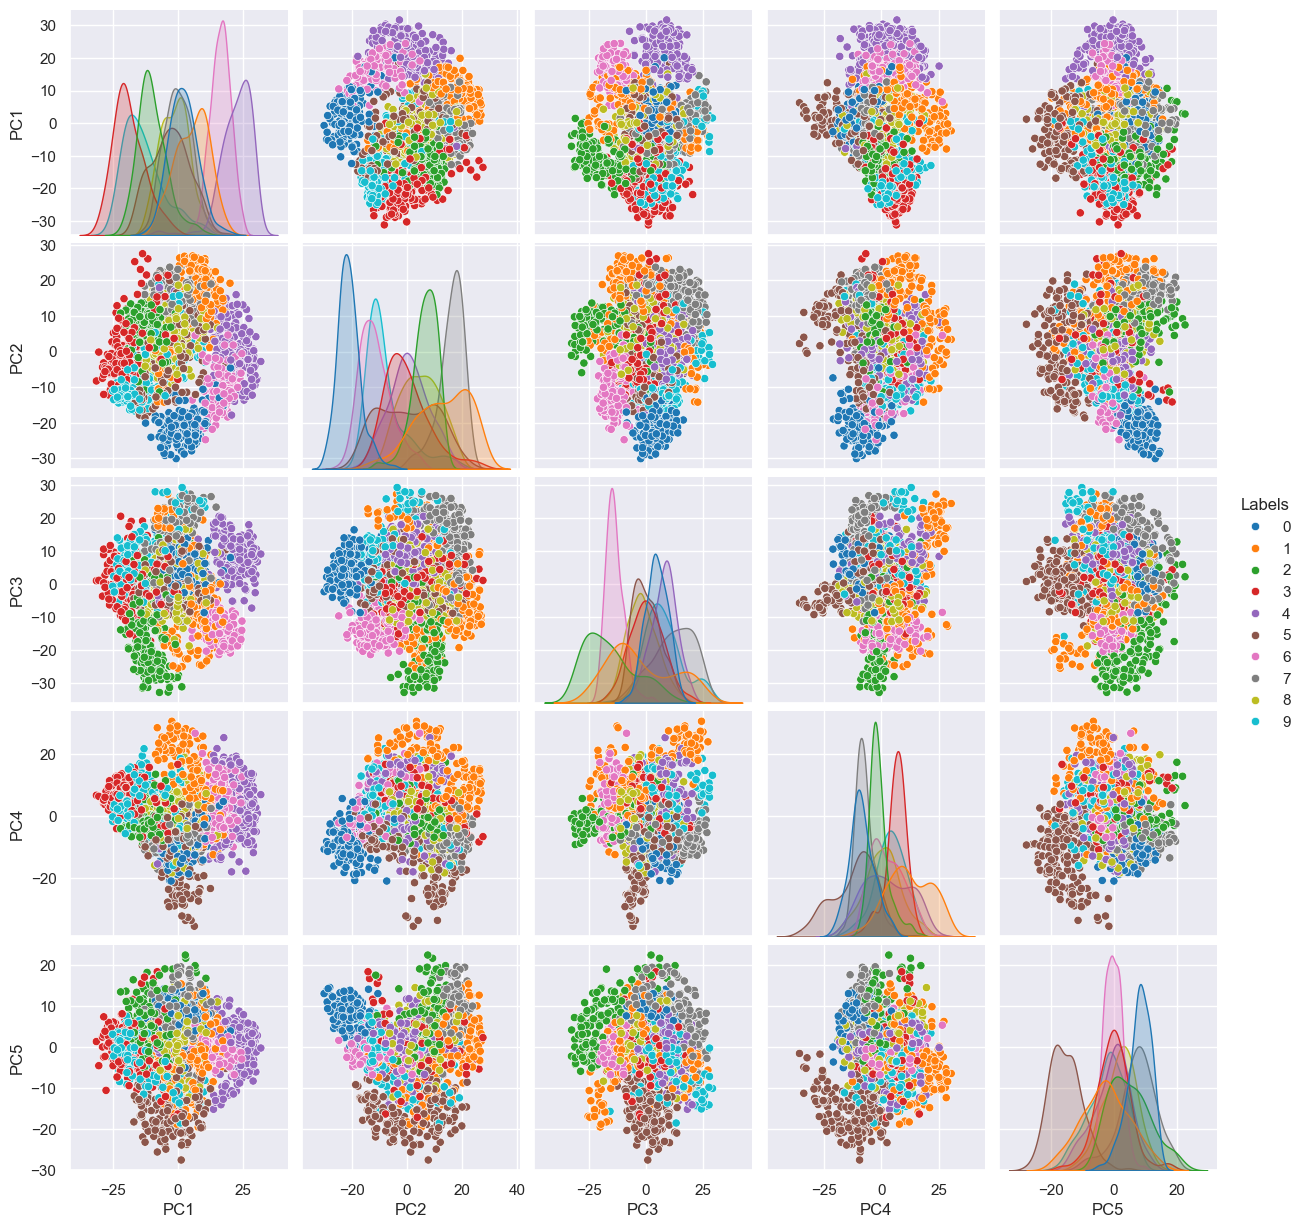

In [18]:
# Misma versión con Pandas
import pandas as pd
import seaborn as sns
X_prueba = projectedZ[:,:5]
y = digits.target

dataFrame = pd.DataFrame(X_prueba,columns=['PC1','PC2','PC3','PC4','PC5'])
dataFrame['Labels'] = y

sns.pairplot(dataFrame, hue='Labels', palette='tab10')



Recordemos lo que significan estas componentes: los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con mayor varianza.

En resumen, hemos encontrado el escalamiento y la rotación óptima en un espacio de 64 dimensiones que nos permite ver la disposición de los dígitos en dos dimensiones, y lo hemos hecho de forma no supervisada, es decir, sin referencia a las etiquetas.

### ¿Qué significan las componentes?

Podemos ir un poco más lejos y empezar a preguntarnos qué *significan* las dimensiones reducidas.
Este significado puede entenderse en términos de combinaciones de vectores base.
Por ejemplo, cada imagen del conjunto de entrenamiento está definida por una colección de 64 valores de píxeles, que llamaremos el vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Una forma de pensar en esto es en términos de una base de píxeles.
Es decir, para construir la imagen, multiplicamos cada elemento del vector por el píxel que describe y, a continuación, sumamos los resultados para construir la imagen:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

Una forma de reducir la dimensión de estos datos es eliminar todos los vectores de base excepto algunos.
Por ejemplo, si utilizamos sólo los ocho primeros píxeles, obtenemos una proyección de ocho dimensiones de los datos, pero no refleja bien toda la imagen: ¡hemos eliminado casi el 90% de los píxeles!

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pixel-components.png?raw=1)


La fila superior de paneles muestra los píxeles individuales, y la fila inferior muestra la contribución acumulativa de estos píxeles a la construcción de la imagen.
Utilizando sólo ocho de los componentes de la base de píxeles, sólo podemos construir una pequeña parte de la imagen de 64 píxeles.
Si continuáramos esta secuencia y utilizáramos los 64 píxeles, recuperaríamos la imagen original.

Pero la representación por píxeles no es la única elección de base. También podemos utilizar otras funciones base, cada una de las cuales contiene una contribución predefinida de cada píxel, y escribir algo como

$$
image(x) = {\rm media} + x_1 \cdot{\rm (base~1)} + x_2 \cdot{\rm (base~2)} + x_3 \cdot{\rm (base~3)} \cdots
$$

PCA puede concebirse como un proceso de elección de funciones de base óptimas, de forma que la suma de las primeras sea suficiente para reconstruir adecuadamente la mayor parte de los elementos del conjunto de datos.
Las componentes principales, que actúan como la representación de baja dimensión de nuestros datos, son simplemente los coeficientes que multiplican cada uno de los elementos de esta serie.
Esta figura muestra una representación similar de la reconstrucción de este dígito utilizando la media más las ocho primeras funciones de PCA:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pca-components.png?raw=1)


A diferencia de la base de píxeles, la base de PCA nos permite recuperar las características más destacadas de la imagen de entrada ¡con sólo una media más ocho componentes!
La cantidad de cada píxel en cada componente es el corolario de la orientación del vector en nuestro ejemplo bidimensional.
Este es el sentido en el que PCA proporciona una representación de baja dimensión de los datos: descubre un conjunto de funciones de base que son más eficientes que la base de píxeles nativa de los datos de entrada.

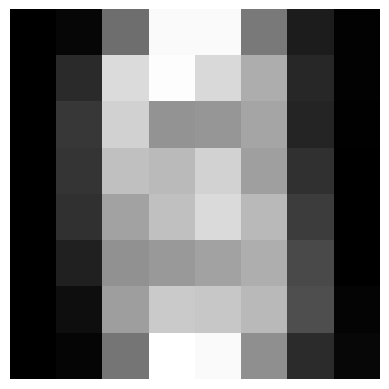

(1797, 64)


In [19]:
meanX = np.mean(X,axis=0)

imgMeanX = meanX.reshape(8,8)

plt.imshow(imgMeanX,cmap='gray')
plt.axis('off')
plt.show()
print(X.shape)

### Elección del número de componentes

Una parte vital cuando usamos PCA es la capacidad de estimar cuántos componentes son necesarios para describir los datos.
Esto puede determinarse observando la *explained variance ratio* acumulada en función del número de componentes:

(64,) 
 Explained variance 0.9590854042457172


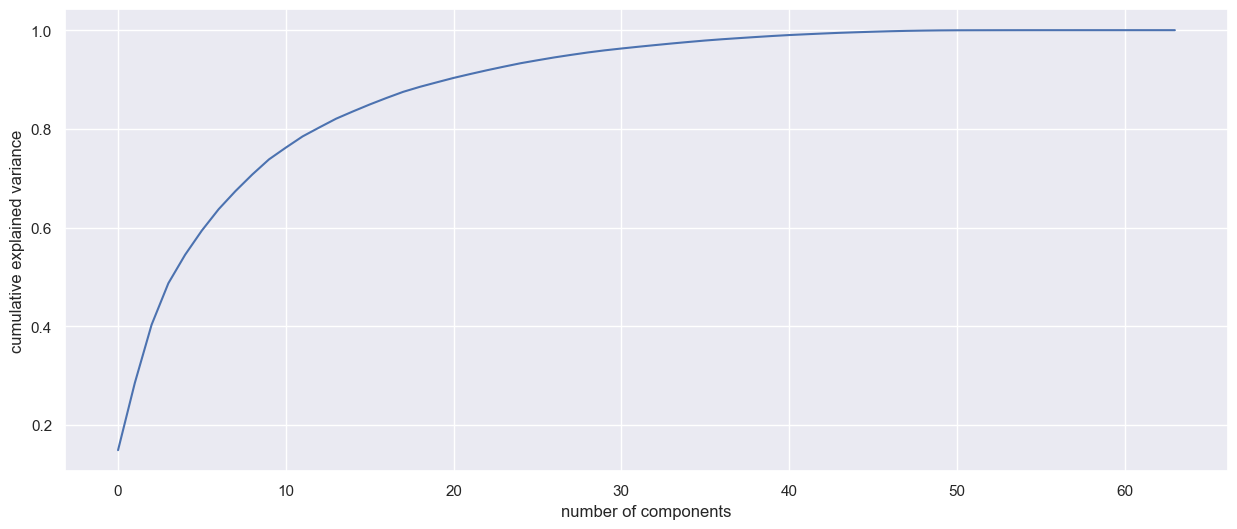

In [20]:
X =digits.data
pca = PCA().fit(X)
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:30]))

plt.figure(figsize=(15,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

Esta curva cuantifica qué parte de la varianza total de 64 dimensiones está contenida en las primeras $N$ componentes.
Por ejemplo, vemos que las 10 primeras componentes contienen aproximadamente el 75% de la varianza, mientras que se necesitan unas 50 componentes para describir cerca del 100% de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información y que necesitaríamos unas 20 componentes para conservar el 90% de la varianza.  Observar este gráfico para un conjunto de datos de alta dimensión puede ayudarle a entender el nivel de redundancia presente en múltiples observaciones.

## PCA como filtro de ruido

PCA también puede utilizarse como método de filtrado de datos ruidosos.
La idea es la siguiente: cualquier componente con una varianza mucho mayor que el efecto del ruido debería verse relativamente poco afectado por el ruido.
Por tanto, si reconstruye los datos utilizando sólo el subconjunto más grande de componentes principales, debería conservar preferentemente la señal y desechar el ruido.

Veamos cómo funciona esto con los datos de los dígitos.
Primero trazaremos varios de los datos de entrada sin ruido:

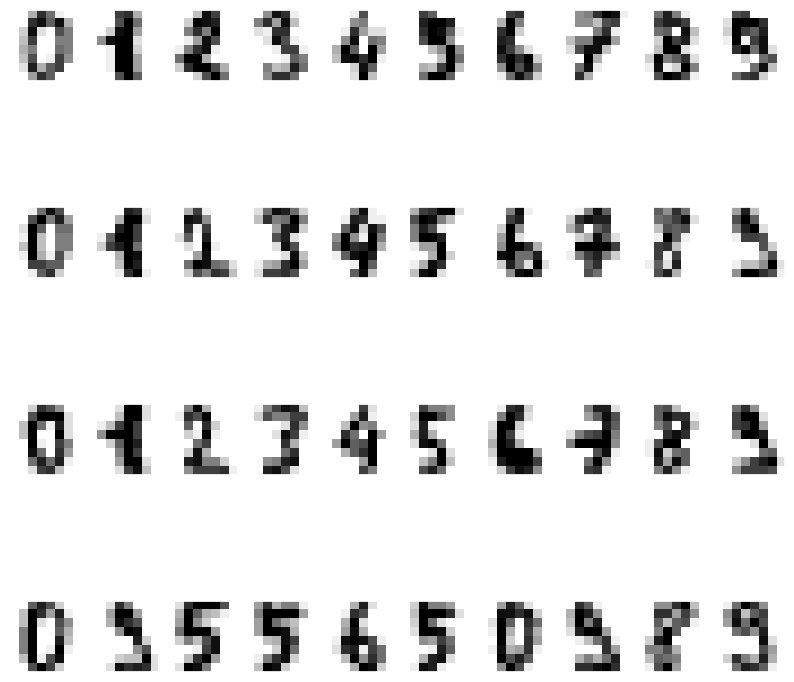

In [21]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora vamos a añadir un poco de ruido aleatorio para crear un conjunto de datos ruidoso y volver a representarlo gráficamente:

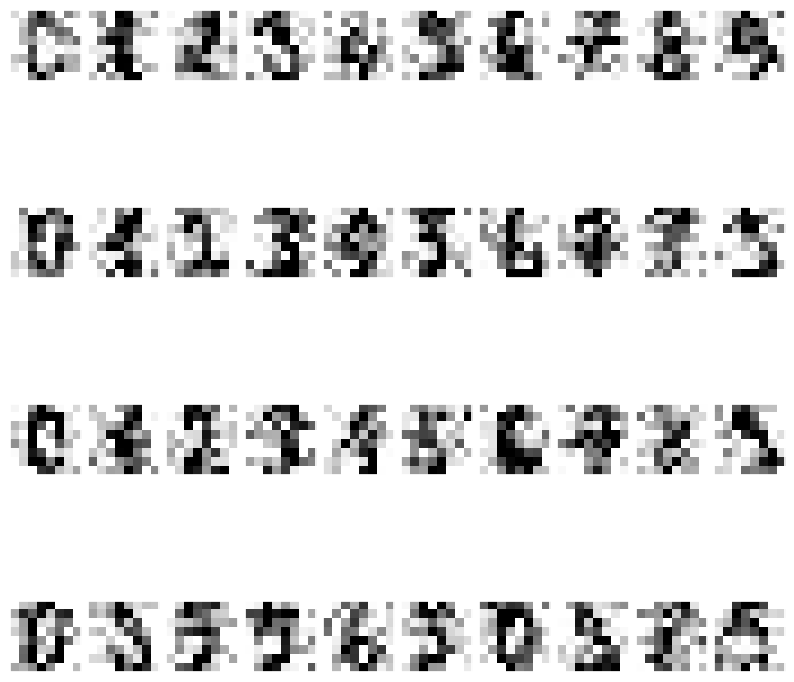

In [22]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 5)
plot_digits(noisy)

A simple vista está claro que las imágenes tienen ruido y contienen píxeles espurios.
Entrenemos PCA con los datos ruidosos y pidamos que la proyección conserve el 40% de la varianza:

In [23]:
# Si le enviamos un flotante entre [0-1], retornará las componentes que retienen
# esa cantidad de varianza
pca = PCA(0.4).fit(noisy)
pca.n_components_

10

En este caso, el 40% de la varianza corresponde a 10 componentes principales. Ahora calculamos estos componentes y utilizamos la inversa de la transformada para reconstruir los dígitos filtrados:

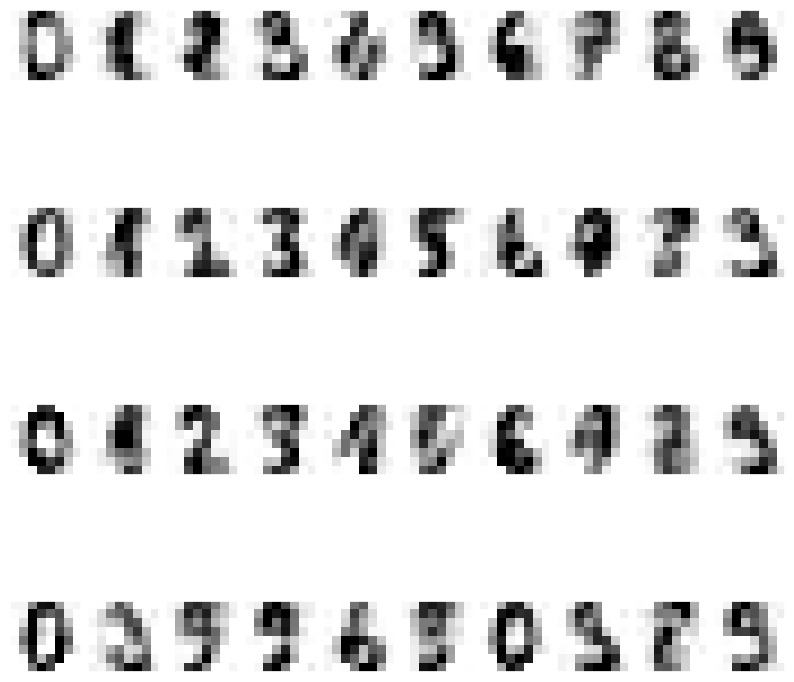

In [24]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de preservar la señal y filtrar el ruido convierte al PCA en una rutina de selección de características muy útil: por ejemplo, en lugar de entrenar un clasificador con datos de muy alta dimensión, se puede entrenar el clasificador en la representación de menor dimensión, que servirá automáticamente para filtrar el ruido aleatorio de las entradas.

## Tipos de PCA

1. **PCA clásico**:
    * El PCA clásico es el algoritmo estándar para realizar análisis de componentes principales.
    * En scikit-learn, se implementa a través de la clase PCA.
    * Calcula los componentes principales y los vectores propios de la matriz de covarianza o de correlación de los datos.
    * PCA clásico es eficiente para conjuntos de datos de tamaño moderado a grande, pero su eficiencia disminuye significativamente con conjuntos de datos muy grandes debido al cálculo de la matriz de covarianza.
   
   
2. **RandomizedPCA**:
    * RandomizedPCA es una variante del PCA estándar que utiliza técnicas de muestreo aleatorio para aproximar los componentes principales.
    * A diferencia del PCA clásico, RandomizedPCA no calcula explícitamente la matriz de covarianza completa.
    * Utiliza técnicas de muestreo aleatorio para aproximar los componentes principales de manera más eficiente, lo que lo hace más rápido que el PCA estándar, especialmente para conjuntos de datos grandes.
    * Sin embargo, la aproximación puede ser menos precisa que la obtenida con PCA clásico, especialmente para conjuntos de datos pequeños o cuando se necesitan todos los componentes principales.
    

3. **SparsePCA**:
    * SparsePCA es una variante de PCA que impone la restricción de que los componentes principales sean dispersos, lo que significa que muchos de sus coeficientes sean exactamente cero.
    * Es útil cuando se espera que los datos tengan una representación dispersa o cuando se quiere interpretar los resultados en términos de un pequeño número de características significativas.
    * SparsePCA utiliza técnicas de optimización para encontrar componentes principales dispersos, lo que lo hace más lento que el PCA estándar pero útil en situaciones donde la dispersión es importante.

## Resumen de Análisis de Componentes Principales

En este laboratorio hemos discutido el uso de PCA para la reducción de dimensión, para la visualización de datos de alta dimensión y para el filtrado de ruido.
Debido a la versatilidad e interpretabilidad de PCA, se ha demostrado su eficacia en una amplia variedad de contextos y disciplinas.
Ante cualquier conjunto de datos de alta dimensión, es recomendable usar PCA para visualizar la relación entre puntos (como hicimos con los dígitos) y entender la dimensionalidad intrínseca (trazando la proporción de varianza explicada).
Ciertamente, PCA no es útil para todos los conjuntos de datos de alta dimensionalidad, pero ofrece una vía directa y eficaz para comprender los datos de alta dimensionalidad.

La principal debilidad de PCA es que tiende a verse muy afectado por los valores atípicos en los datos.
Por esta razón, se han desarrollado muchas variantes robustas de PCA, muchas de las cuales actúan para descartar iterativamente puntos de datos que están mal descritos por los componentes iniciales.
Scikit-Learn contiene un par de variantes interesantes de PCA, incluyendo ``RandomizedPCA`` y ``SparsePCA``, ambos también en el submódulo ``sklearn.decomposition``.
``RandomizedPCA``, que ya hemos visto antes, utiliza un método no determinista para aproximar rápidamente los primeros componentes principales en datos de muy alta dimensión, mientras que ``SparsePCA`` introduce un término de regularización (véase https://en.wikipedia.org/wiki/Sparse_PCA) que sirve para reforzar la escasez de los componentes.

---
## **Trabajo de laboratorio:**

Vamos a utilizar PCA sobre las características extraídas en el **Miniproyecto 2**. Específicamente analizaremos los siguientes casos:

1. **Número de componentes = 2:**

  Graficar las características proyectadas a un espacio de dos componentes principales. Utilice un color diferente para cada clase. ¿Qué beneficio tiene expresar los datos en este espacio de dimensión reducida?, argumente su respuesta. ¿Qué porcentaje de varianza tienen las 2 componentes graficadas? ¿Es posible discriminar visualmente las clases? 


2. **Número de componentes = 5:**

  Utilice pair plots para graficar las características proyectadas al espacio de componentes principales de dimensión 5. ¿Para qué pares de componentes se generan grupos o clusters distintivos para cada clase?. Analice y discuta los resultados. ¿Qué porcentaje de varianza tienen las 5 componentes graficadas?


3. **Número de componentes = número de características:**

  Haga un análisis de varianza (gráfico de varianza acumulada) y determine cuántos componentes son necesarios para preservar el 90% y el 95% de la varianza explicada en los datos. ¿En qué porcentaje se redujo la dimensionalidad?, ¿qué beneficios tiene esta reducción?. Argumente.
  
**NOTA:** Lo realizado en este laboratorio puede incluirlo como una etapa extra en la entrega del Miniproyecto 2. 

---